In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#### Load & Understand the Data

In [173]:
# Load the CSV file
df = pd.read_csv("Exploratory_Data_Analysis.csv")

In [174]:
# Show first 5 rows to understand structure
display(df.head())

,category_code,status,founded_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,...,country_GBR,country_IND,country_IRL,country_ISR,country_SWE,country_USA,country_other,isClosed,active_days,Operating_Status
0,medical,operating,2006,15.679245,2011.0,2012.0,2.0,11300000.0,2010.465221,2011.126153,...,False,False,False,False,False,True,False,1,5475,Operating
1,enterprise,operating,2004,15.679245,2011.0,2011.0,1.0,1500000.0,2010.000000,2010.000000,...,False,False,False,False,False,True,False,1,6205,Operating
2,web,operating,2006,15.679245,2007.0,2007.0,1.0,2500000.0,2010.000000,2012.000000,...,False,False,False,False,False,True,False,1,5475,Operating
3,software,operating,1996,15.679245,2011.0,2012.0,2.0,840000.0,2010.465221,2011.126153,...,False,False,False,False,False,True,False,1,9125,Operating
4,education,operating,2009,15.679245,2011.0,2011.0,1.0,559522.0,2010.465221,2011.126153,...,True,False,False,False,False,False,False,1,4380,Operating


In [175]:
# Shape of the dataset (rows x columns)
print("Shape of Dataset (Rows, Columns):", df.shape)

Shape of Dataset (Rows, Columns): (7326, 28)


In [176]:
# Information about columns, data types, and missing values
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7326 entries, 0 to 7325
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category_code       7326 non-null   object 
 1   status              7326 non-null   object 
 2   founded_at          7326 non-null   int64  
 3   investment_rounds   7326 non-null   float64
 4   first_funding_at    7326 non-null   float64
 5   last_funding_at     7326 non-null   float64
 6   funding_rounds      7326 non-null   float64
 7   funding_total_usd   7326 non-null   float64
 8   first_milestone_at  7326 non-null   float64
 9   last_milestone_at   7326 non-null   float64
 10  milestones          7326 non-null   float64
 11  relationships       7326 non-null   float64
 12  lat                 7326 non-null   float64
 13  lng                 7326 non-null   float64
 14  country_CAN         7326 non-null   bool   
 15  country_DEU         7326 non-null 

In [177]:
# Basic statistical summary for numerical columns
print("Statistical Summary:")
display(df.describe())

Statistical Summary:


,founded_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
count,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7.326000e+03,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.0,7326.000000
mean,2006.623123,15.679245,2010.654404,2011.108725,1.328965,3.414547e+06,2010.465221,2011.126153,1.578409,4.752173,39.061251,-64.435424,1.0,5247.560060
std,7.030586,5.590772,2.386757,2.296891,0.469869,2.871523e+06,2.209811,2.084369,0.572175,14.598979,12.315790,61.311449,0.0,2566.163876
min,1906.000000,1.000000,1987.000000,1987.000000,1.000000,5.120000e+05,1978.000000,1978.000000,1.000000,1.000000,-41.286460,-157.858333,1.0,2920.000000
25%,2005.000000,15.679245,2010.000000,2010.000000,1.000000,1.100004e+06,2010.465221,2011.126153,1.000000,2.000000,36.162664,-118.243685,1.0,3650.000000
50%,2009.000000,15.679245,2011.000000,2012.000000,1.000000,2.296456e+06,2010.465221,2011.126153,1.578409,4.000000,39.295514,-79.904228,1.0,4380.000000
75%,2011.000000,15.679245,2013.000000,2013.000000,2.000000,5.000000e+06,2011.000000,2012.000000,1.578409,5.000000,44.047520,-3.703790,1.0,5840.000000
max,2013.000000,478.000000,2013.000000,2013.000000,2.000000,1.150000e+07,2014.000000,2014.000000,7.000000,982.000000,68.075576,174.811945,1.0,41975.000000


# 1. Understand the Domain and Problem Statement

#### Task: Gain a comprehensive understanding of the problem domain to identify the types of features that may be relevant
#### - Steps:

#### 1.1- Review the Objective: Clearly understand the goal of the analysis or model (e.g., classification, regression).

In [178]:
# Step 1.1 — Review the Objective

project_objective = """
Project Objective:
----------------------
Perform Exploratory Data Analysis (EDA) and Feature Engineering on the dataset.

Goal:
- Understand the dataset in depth.
- Discover hidden patterns, trends, and correlations.
- Clean and prepare the data for predictive modeling.
- Engineer meaningful features to improve model performance.

Type of Task:
- At this stage, we are performing EDA and Feature Engineering.
- Final goal could be Classification or Regression depending on the target variable.
"""

print(project_objective)


Project Objective:
----------------------
Perform Exploratory Data Analysis (EDA) and Feature Engineering on the dataset.

Goal:
- Understand the dataset in depth.
- Discover hidden patterns, trends, and correlations.
- Clean and prepare the data for predictive modeling.
- Engineer meaningful features to improve model performance.

Type of Task:
- At this stage, we are performing EDA and Feature Engineering.
- Final goal could be Classification or Regression depending on the target variable.



#### 1.2- Domain Knowledge: Use domain knowledge to determine which features might be important or relevant to the problem

In [179]:
# Display all column names in the dataset
print("All Columns in the Dataset:\n")
for idx, col in enumerate(df.columns, 1):
    print(f"{idx}. {col}")

All Columns in the Dataset:

1. category_code
2. status
3. founded_at
4. investment_rounds
5. first_funding_at
6. last_funding_at
7. funding_rounds
8. funding_total_usd
9. first_milestone_at
10. last_milestone_at
11. milestones
12. relationships
13. lat
14. lng
15. country_CAN
16. country_DEU
17. country_ESP
18. country_FRA
19. country_GBR
20. country_IND
21. country_IRL
22. country_ISR
23. country_SWE
24. country_USA
25. country_other
26. isClosed
27. active_days
28. Operating_Status


In [180]:
# Check basic information about the dataset
# This shows data types, non-null counts, and memory usage
print(" Dataset Information:\n")
print(df.info())

 Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7326 entries, 0 to 7325
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category_code       7326 non-null   object 
 1   status              7326 non-null   object 
 2   founded_at          7326 non-null   int64  
 3   investment_rounds   7326 non-null   float64
 4   first_funding_at    7326 non-null   float64
 5   last_funding_at     7326 non-null   float64
 6   funding_rounds      7326 non-null   float64
 7   funding_total_usd   7326 non-null   float64
 8   first_milestone_at  7326 non-null   float64
 9   last_milestone_at   7326 non-null   float64
 10  milestones          7326 non-null   float64
 11  relationships       7326 non-null   float64
 12  lat                 7326 non-null   float64
 13  lng                 7326 non-null   float64
 14  country_CAN         7326 non-null   bool   
 15  country_DEU         7326 non-nul

In [181]:
# Identify numerical columns (integer or float types)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(" Numerical Columns:")
print(numerical_cols)

 Numerical Columns:
['founded_at', 'investment_rounds', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships', 'lat', 'lng', 'isClosed', 'active_days']


In [182]:
# Identify categorical columns (object/string types)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(" Categorical Columns:")
print(categorical_cols)

 Categorical Columns:
['category_code', 'status', 'Operating_Status']


In [183]:
# Display the first 5 rows of the dataset
print(" Dataset Sample (first 5 rows):")
display(df.head())

 Dataset Sample (first 5 rows):


,category_code,status,founded_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,...,country_GBR,country_IND,country_IRL,country_ISR,country_SWE,country_USA,country_other,isClosed,active_days,Operating_Status
0,medical,operating,2006,15.679245,2011.0,2012.0,2.0,11300000.0,2010.465221,2011.126153,...,False,False,False,False,False,True,False,1,5475,Operating
1,enterprise,operating,2004,15.679245,2011.0,2011.0,1.0,1500000.0,2010.000000,2010.000000,...,False,False,False,False,False,True,False,1,6205,Operating
2,web,operating,2006,15.679245,2007.0,2007.0,1.0,2500000.0,2010.000000,2012.000000,...,False,False,False,False,False,True,False,1,5475,Operating
3,software,operating,1996,15.679245,2011.0,2012.0,2.0,840000.0,2010.465221,2011.126153,...,False,False,False,False,False,True,False,1,9125,Operating
4,education,operating,2009,15.679245,2011.0,2011.0,1.0,559522.0,2010.465221,2011.126153,...,True,False,False,False,False,False,False,1,4380,Operating


#### 1.3 Examine the Data: Understand the existing data types (numerical, categorical, text, dates, etc.) and their roles in the context of the problem

In [184]:
# 1. Check shape of dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (7326, 28)


In [185]:
# 3. Check data types of all columns
print("Data Types:")
print(df.dtypes)

Data Types:
category_code          object
status                 object
founded_at              int64
investment_rounds     float64
first_funding_at      float64
last_funding_at       float64
funding_rounds        float64
funding_total_usd     float64
first_milestone_at    float64
last_milestone_at     float64
milestones            float64
relationships         float64
lat                   float64
lng                   float64
country_CAN              bool
country_DEU              bool
country_ESP              bool
country_FRA              bool
country_GBR              bool
country_IND              bool
country_IRL              bool
country_ISR              bool
country_SWE              bool
country_USA              bool
country_other            bool
isClosed                int64
active_days             int64
Operating_Status       object
dtype: object


In [186]:
# 4. Separate numerical and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)


Numeric Columns: ['founded_at', 'investment_rounds', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships', 'lat', 'lng', 'isClosed', 'active_days']
Categorical Columns: ['category_code', 'status', 'Operating_Status']


In [187]:
# 5. Check missing values in the dataset
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
category_code         0
status                0
founded_at            0
investment_rounds     0
first_funding_at      0
last_funding_at       0
funding_rounds        0
funding_total_usd     0
first_milestone_at    0
last_milestone_at     0
milestones            0
relationships         0
lat                   0
lng                   0
country_CAN           0
country_DEU           0
country_ESP           0
country_FRA           0
country_GBR           0
country_IND           0
country_IRL           0
country_ISR           0
country_SWE           0
country_USA           0
country_other         0
isClosed              0
active_days           0
Operating_Status      0
dtype: int64


In [188]:
# 6. Show basic statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
print(df[numeric_cols].describe())

Summary Statistics for Numerical Columns:
        founded_at  investment_rounds  first_funding_at  last_funding_at  \
count  7326.000000        7326.000000       7326.000000      7326.000000   
mean   2006.623123          15.679245       2010.654404      2011.108725   
std       7.030586           5.590772          2.386757         2.296891   
min    1906.000000           1.000000       1987.000000      1987.000000   
25%    2005.000000          15.679245       2010.000000      2010.000000   
50%    2009.000000          15.679245       2011.000000      2012.000000   
75%    2011.000000          15.679245       2013.000000      2013.000000   
max    2013.000000         478.000000       2013.000000      2013.000000   

       funding_rounds  funding_total_usd  first_milestone_at  \
count     7326.000000       7.326000e+03         7326.000000   
mean         1.328965       3.414547e+06         2010.465221   
std          0.469869       2.871523e+06            2.209811   
min          1.00

In [189]:
# 7. Count unique values in categorical columns
print("Unique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Unique Values in Categorical Columns:
category_code: 42 unique values
status: 2 unique values
Operating_Status: 1 unique values


# 2. Feature Selection

#### - Task: Identify the most relevant features for the analysis or modeling task.
#### - Steps:

####  2.1 - Remove Irrelevant Features: Eliminate features that do not have any significant impact on the target variable or are not relevant to the problem

In [190]:
# Drop unnecessary columns in the dataset
irrelevant_cols = ['id', 'serial_number', 'unnecessary_column']  # Replace with your actual irrelevant columns
df = df.drop(columns=[col for col in irrelevant_cols if col in df.columns], errors='ignore')

print("Remaining Columns after Removing Irrelevant Features:")
print(df.columns.tolist())

Remaining Columns after Removing Irrelevant Features:
['category_code', 'status', 'founded_at', 'investment_rounds', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships', 'lat', 'lng', 'country_CAN', 'country_DEU', 'country_ESP', 'country_FRA', 'country_GBR', 'country_IND', 'country_IRL', 'country_ISR', 'country_SWE', 'country_USA', 'country_other', 'isClosed', 'active_days', 'Operating_Status']


#### 2.2  - Handle Multicollinearity: Use correlation analysis or variance inflation factor (VIF) to remove redundant features

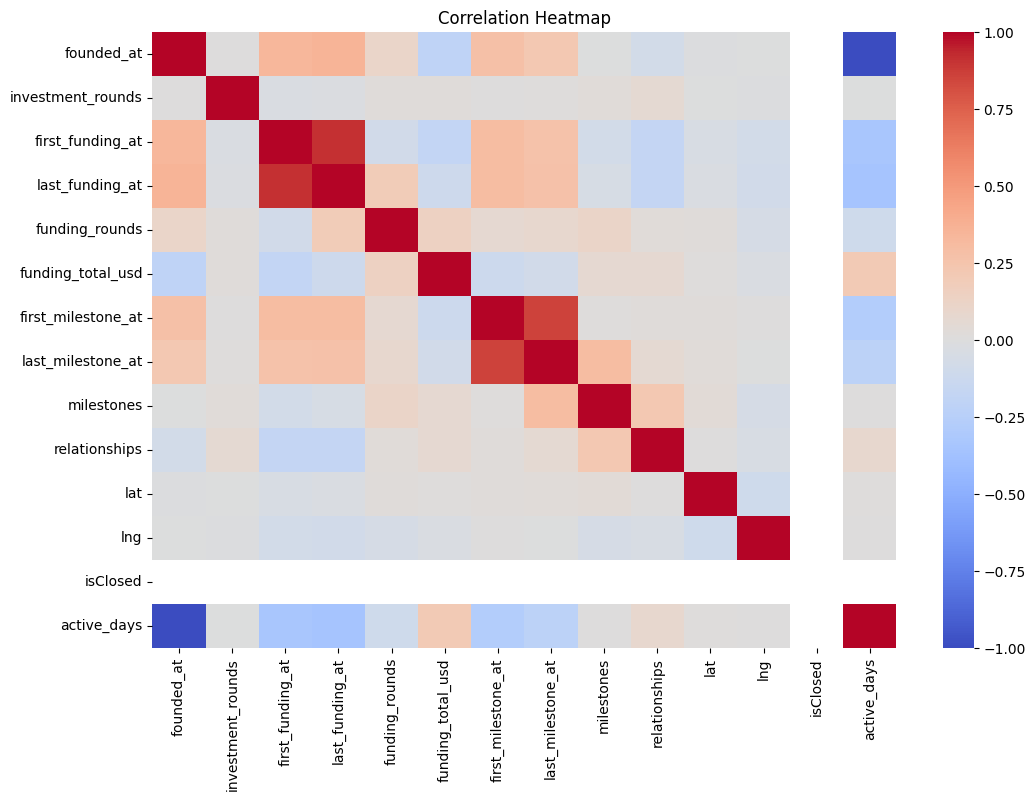

Removed 3 highly correlated features:
{'active_days', 'last_funding_at', 'last_milestone_at'}


In [191]:
#  Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Drop one of the features from highly correlated pairs
threshold = 0.85  # Features above this correlation are considered redundant
high_corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

# Drop highly correlated features from original dataframe
df = df.drop(columns=high_corr_features, errors="ignore")

print(f"Removed {len(high_corr_features)} highly correlated features:")
print(high_corr_features)

#### 2.3 - Feature Importance Technique: Apply feature importance methods such as mutual information, Random Forest feature importance, or Lasso regularization to select important features

In [192]:
df

,category_code,status,founded_at,investment_rounds,first_funding_at,funding_rounds,funding_total_usd,first_milestone_at,milestones,relationships,...,country_FRA,country_GBR,country_IND,country_IRL,country_ISR,country_SWE,country_USA,country_other,isClosed,Operating_Status
0,medical,operating,2006,15.679245,2011.0,2.0,11300000.0,2010.465221,1.578409,2.000000,...,False,False,False,False,False,False,True,False,1,Operating
1,enterprise,operating,2004,15.679245,2011.0,1.0,1500000.0,2010.000000,1.000000,8.000000,...,False,False,False,False,False,False,True,False,1,Operating
2,web,operating,2006,15.679245,2007.0,1.0,2500000.0,2010.000000,2.000000,7.000000,...,False,False,False,False,False,False,True,False,1,Operating
3,software,operating,1996,15.679245,2011.0,2.0,840000.0,2010.465221,1.578409,19.000000,...,False,False,False,False,False,False,True,False,1,Operating
4,education,operating,2009,15.679245,2011.0,1.0,559522.0,2010.465221,1.578409,4.752173,...,False,True,False,False,False,False,False,False,1,Operating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321,web,operating,2008,15.679245,2008.0,2.0,600000.0,2010.000000,1.000000,2.000000,...,False,False,False,False,False,False,True,False,1,Operating
7322,web,operating,2006,15.679245,2007.0,1.0,10000000.0,2006.000000,1.000000,4.000000,...,False,False,True,False,False,False,False,False,1,Operating
7323,enterprise,operating,2011,15.679245,2011.0,1.0,750000.0,2011.000000,1.000000,3.000000,...,False,False,False,False,False,False,True,False,1,Operating
7324,web,operating,2007,15.679245,2008.0,1.0,798679.0,2008.000000,3.000000,2.000000,...,False,False,False,False,False,False,False,True,1,Operating


In [193]:
# 1. Prepare Data
# ----------------------------
X = df.drop("status", axis=1)   # <- Replace 'status' with your target column
y = df["status"]

# Encode target if categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Convert categorical features to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [194]:
# Mutual Information 
mi_scores = mutual_info_classif(X, y)
mi_df = pd.DataFrame({"Feature": X.columns, "MI_Score": mi_scores})
mi_df = mi_df.sort_values(by="MI_Score", ascending=False)

print(" Top Features (Mutual Information):\n", mi_df.head(10))

 Top Features (Mutual Information):
                Feature  MI_Score
0           founded_at  0.008749
7        relationships  0.007946
1    investment_rounds  0.004021
4    funding_total_usd  0.002748
20       country_other  0.002397
19         country_USA  0.002322
6           milestones  0.002289
2     first_funding_at  0.002249
8                  lat  0.002207
5   first_milestone_at  0.002127


In [195]:
# Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

rf_df = pd.DataFrame({"Feature": X.columns, "RF_Importance": rf.feature_importances_})
rf_df = rf_df.sort_values(by="RF_Importance", ascending=False)

print(" Top Features (Random Forest):\n", rf_df.head(10))

 Top Features (Random Forest):
               Feature  RF_Importance
0          founded_at       0.145733
7       relationships       0.145142
4   funding_total_usd       0.114945
8                 lat       0.109625
9                 lng       0.104322
2    first_funding_at       0.073211
6          milestones       0.067653
5  first_milestone_at       0.051972
1   investment_rounds       0.035936
3      funding_rounds       0.018789


In [196]:
# Lasso Regularization
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X, y)

lasso_df = pd.DataFrame({"Feature": X.columns, "Lasso_Coeff": lasso.coef_})
lasso_df = lasso_df.sort_values(by="Lasso_Coeff", ascending=False)

print(" Top Features (Lasso Regularization):\n", lasso_df.head(10))

 Top Features (Lasso Regularization):
                Feature  Lasso_Coeff
0           founded_at          0.0
1    investment_rounds          0.0
2     first_funding_at          0.0
3       funding_rounds          0.0
5   first_milestone_at          0.0
6           milestones         -0.0
7        relationships         -0.0
11         country_DEU          0.0
8                  lat          0.0
9                  lng          0.0


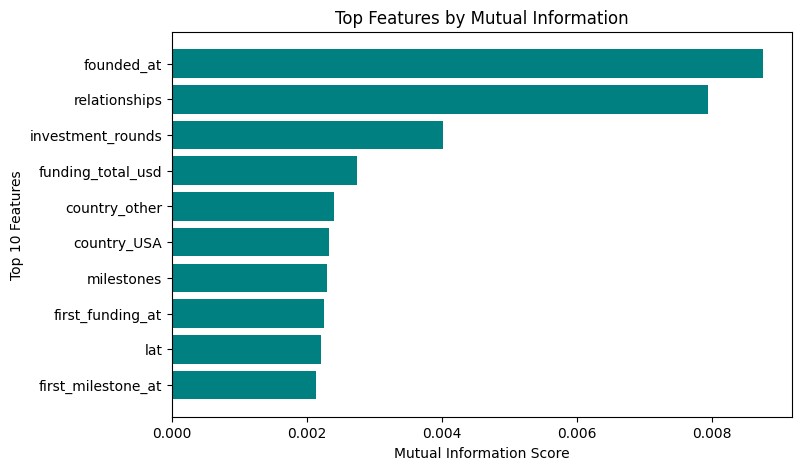

In [197]:
# 5. Visualization (Optional)
plt.figure(figsize=(8,5))
plt.barh(mi_df["Feature"].head(10), mi_df["MI_Score"].head(10), color="teal")
plt.xlabel("Mutual Information Score")
plt.ylabel("Top 10 Features")
plt.title("Top Features by Mutual Information")
plt.gca().invert_yaxis()
plt.show()

#### 2.4 - Domain Expert Input: Collaborate with domain experts to identify features that might have significance based on business context

In [198]:
df

,category_code,status,founded_at,investment_rounds,first_funding_at,funding_rounds,funding_total_usd,first_milestone_at,milestones,relationships,...,country_FRA,country_GBR,country_IND,country_IRL,country_ISR,country_SWE,country_USA,country_other,isClosed,Operating_Status
0,medical,operating,2006,15.679245,2011.0,2.0,11300000.0,2010.465221,1.578409,2.000000,...,False,False,False,False,False,False,True,False,1,Operating
1,enterprise,operating,2004,15.679245,2011.0,1.0,1500000.0,2010.000000,1.000000,8.000000,...,False,False,False,False,False,False,True,False,1,Operating
2,web,operating,2006,15.679245,2007.0,1.0,2500000.0,2010.000000,2.000000,7.000000,...,False,False,False,False,False,False,True,False,1,Operating
3,software,operating,1996,15.679245,2011.0,2.0,840000.0,2010.465221,1.578409,19.000000,...,False,False,False,False,False,False,True,False,1,Operating
4,education,operating,2009,15.679245,2011.0,1.0,559522.0,2010.465221,1.578409,4.752173,...,False,True,False,False,False,False,False,False,1,Operating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321,web,operating,2008,15.679245,2008.0,2.0,600000.0,2010.000000,1.000000,2.000000,...,False,False,False,False,False,False,True,False,1,Operating
7322,web,operating,2006,15.679245,2007.0,1.0,10000000.0,2006.000000,1.000000,4.000000,...,False,False,True,False,False,False,False,False,1,Operating
7323,enterprise,operating,2011,15.679245,2011.0,1.0,750000.0,2011.000000,1.000000,3.000000,...,False,False,False,False,False,False,True,False,1,Operating
7324,web,operating,2007,15.679245,2008.0,1.0,798679.0,2008.000000,3.000000,2.000000,...,False,False,False,False,False,False,False,True,1,Operating


In [199]:
# X, y define
X = df.drop("isClosed", axis=1)
y = df["isClosed"]

In [200]:
# Mutual Information calculate
mi_scores = mutual_info_classif(X.select_dtypes(include=['number']), y)

In [201]:
# DataFrame create
mi_df = pd.DataFrame({"Feature": X.select_dtypes(include=['number']).columns, "Score": mi_scores})
mi_df = mi_df.sort_values(by="Score", ascending=False)

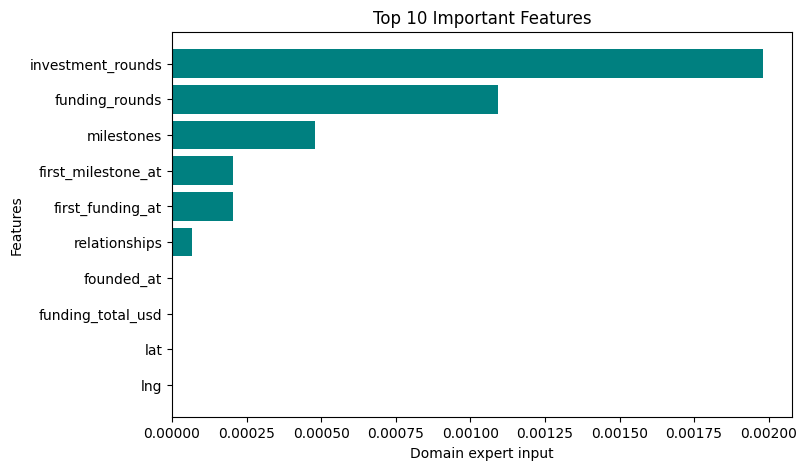

In [202]:
# Top 10 features plot
plt.figure(figsize=(8,5))
plt.barh(mi_df["Feature"].head(10), mi_df["Score"].head(10), color="teal")
plt.xlabel("Domain expert input")
plt.ylabel("Features")
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.show()

# 3. Create New Features
#### - Task: Derive new features from the existing data that can enhance model performance.
#### - Steps:

#### 3.1 - Mathematical Transformations: Create new features by applying mathematical operations (e.g., sum, difference, product, ratio) to existing numerical features.

In [203]:
df

,category_code,status,founded_at,investment_rounds,first_funding_at,funding_rounds,funding_total_usd,first_milestone_at,milestones,relationships,...,country_FRA,country_GBR,country_IND,country_IRL,country_ISR,country_SWE,country_USA,country_other,isClosed,Operating_Status
0,medical,operating,2006,15.679245,2011.0,2.0,11300000.0,2010.465221,1.578409,2.000000,...,False,False,False,False,False,False,True,False,1,Operating
1,enterprise,operating,2004,15.679245,2011.0,1.0,1500000.0,2010.000000,1.000000,8.000000,...,False,False,False,False,False,False,True,False,1,Operating
2,web,operating,2006,15.679245,2007.0,1.0,2500000.0,2010.000000,2.000000,7.000000,...,False,False,False,False,False,False,True,False,1,Operating
3,software,operating,1996,15.679245,2011.0,2.0,840000.0,2010.465221,1.578409,19.000000,...,False,False,False,False,False,False,True,False,1,Operating
4,education,operating,2009,15.679245,2011.0,1.0,559522.0,2010.465221,1.578409,4.752173,...,False,True,False,False,False,False,False,False,1,Operating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321,web,operating,2008,15.679245,2008.0,2.0,600000.0,2010.000000,1.000000,2.000000,...,False,False,False,False,False,False,True,False,1,Operating
7322,web,operating,2006,15.679245,2007.0,1.0,10000000.0,2006.000000,1.000000,4.000000,...,False,False,True,False,False,False,False,False,1,Operating
7323,enterprise,operating,2011,15.679245,2011.0,1.0,750000.0,2011.000000,1.000000,3.000000,...,False,False,False,False,False,False,True,False,1,Operating
7324,web,operating,2007,15.679245,2008.0,1.0,798679.0,2008.000000,3.000000,2.000000,...,False,False,False,False,False,False,False,True,1,Operating


In [204]:
# Step 1: Numerical Columns Identify 
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:", numeric_cols.tolist())

Numeric Columns: ['founded_at', 'investment_rounds', 'first_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'milestones', 'relationships', 'lat', 'lng', 'isClosed']


In [205]:
# Step 2: Mathematical Feature Engineering (Simple & Useful)
# Total Funding Activity (Sum)
df["total_funding_activity"] = df["funding_total_usd"] + df["funding_rounds"] + df["investment_rounds"]

# Difference between funding & investment rounds
df["rounds_difference"] = df["funding_rounds"] - df["investment_rounds"]

# Funding per milestone (Ratio)
df["funding_per_milestone"] = df["funding_total_usd"] / (df["milestones"] + 1)

# Funding per relationship (Ratio)
df["funding_per_relationship"] = df["funding_total_usd"] / (df["relationships"] + 1)

# Step 5: Verify new features
print("Shape after feature creation:", df.shape)
print(df[["total_funding_activity", "rounds_difference", "funding_per_milestone", "funding_per_relationship"]].head())

Shape after feature creation: (7326, 29)
   total_funding_activity  rounds_difference  funding_per_milestone  \
0            1.130002e+07         -13.679245           4.382547e+06   
1            1.500017e+06         -14.679245           7.500000e+05   
2            2.500017e+06         -14.679245           8.333333e+05   
3            8.400177e+05         -13.679245           3.257822e+05   
4            5.595387e+05         -14.679245           2.170028e+05   

   funding_per_relationship  
0              3.766667e+06  
1              1.666667e+05  
2              3.125000e+05  
3              4.200000e+04  
4              9.727141e+04  


#### 3.2. - Aggregations: Aggregate data to a different granularity level (e.g., mean, sum, count) based on specific groupings (e.g., time periods, categories).

In [206]:
# Step 1: Check dataset info
print("Columns:", df.columns.tolist())
print(df.head())

Columns: ['category_code', 'status', 'founded_at', 'investment_rounds', 'first_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'milestones', 'relationships', 'lat', 'lng', 'country_CAN', 'country_DEU', 'country_ESP', 'country_FRA', 'country_GBR', 'country_IND', 'country_IRL', 'country_ISR', 'country_SWE', 'country_USA', 'country_other', 'isClosed', 'Operating_Status', 'total_funding_activity', 'rounds_difference', 'funding_per_milestone', 'funding_per_relationship']
  category_code     status  founded_at  investment_rounds  first_funding_at  \
0       medical  operating        2006          15.679245            2011.0   
1    enterprise  operating        2004          15.679245            2011.0   
2           web  operating        2006          15.679245            2007.0   
3      software  operating        1996          15.679245            2011.0   
4     education  operating        2009          15.679245            2011.0   

   funding_rounds  funding_t

In [207]:
# Step 2: Aggregations based on categories (Example: 'category_code')
if "category_code" in df.columns:
    category_agg = df.groupby("category_code").agg({
        "funding_total_usd": ["mean", "sum", "count"],
        "funding_rounds": "mean",
        "investment_rounds": "mean"
    }).reset_index()

    # Rename columns for clarity
    category_agg.columns = ["category_code", "avg_funding", "total_funding", "company_count", 
                            "avg_funding_rounds", "avg_investment_rounds"]

    print("Aggregation based on category_code:")
    print(category_agg.head())

Aggregation based on category_code:
  category_code   avg_funding  total_funding  company_count  \
0   advertising  3.401997e+06   1.024001e+09            301   
1     analytics  3.565707e+06   7.381014e+08            207   
2    automotive  3.822321e+06   7.262411e+07             19   
3       biotech  3.651635e+06   2.800804e+09            767   
4     cleantech  4.479972e+06   8.063950e+08            180   

   avg_funding_rounds  avg_investment_rounds  
0            1.411960              15.630477  
1            1.478261              15.608331  
2            1.473684              15.679245  
3            1.324641              15.647487  
4            1.288889              15.467925  


In [208]:
# Step 3: Aggregations based on founded year (Example: 'founded_at')
if "founded_at" in df.columns:
    # founded_at convert to year
    df["founded_year"] = pd.to_datetime(df["founded_at"], errors="coerce").dt.year
    
    year_agg = df.groupby("founded_year").agg({
        "funding_total_usd": ["mean", "sum", "count"],
        "funding_rounds": "mean",
        "investment_rounds": "mean"
    }).reset_index()

    # Rename columns for clarity
    year_agg.columns = ["founded_year", "avg_funding", "total_funding", "company_count",
                        "avg_funding_rounds", "avg_investment_rounds"]

    print(" Aggregation based on founded_year:")
    print(year_agg.head())

 Aggregation based on founded_year:
   founded_year   avg_funding  total_funding  company_count  \
0          1970  3.414547e+06   2.501497e+10           7326   

   avg_funding_rounds  avg_investment_rounds  
0            1.328965              15.679245  


#### 3.3- Date and Time Features: Extract meaningful information from date and time fields (e.g., day of the week, hour of the day, month, quarter).

In [209]:
# Step 1: Check if 'founded_at' column exists
if "founded_at" in df.columns:
    df["founded_at"] = pd.to_datetime(df["founded_at"], errors="coerce")
    # Extract Date & Time Features
    df["founded_year"] = df["founded_at"].dt.year
    df["founded_month"] = df["founded_at"].dt.month
    df["founded_day"] = df["founded_at"].dt.day
    df["founded_dayofweek"] = df["founded_at"].dt.dayofweek      # 0=Monday, 6=Sunday
    df["founded_weekday_name"] = df["founded_at"].dt.day_name()  # Monday, Tuesday, etc.
    df["founded_quarter"] = df["founded_at"].dt.quarter
# Step 2: Print Sample Output
    print(" New Date & Time Features Added:")
    print(df[[
        "founded_at",
        "founded_year",
        "founded_month",
        "founded_day",
        "founded_dayofweek",
        "founded_weekday_name",
        "founded_quarter"
    ]].head())

else:
    print(" 'founded_at' column not found in dataset!")

 New Date & Time Features Added:
                     founded_at  founded_year  founded_month  founded_day  \
0 1970-01-01 00:00:00.000002006          1970              1            1   
1 1970-01-01 00:00:00.000002004          1970              1            1   
2 1970-01-01 00:00:00.000002006          1970              1            1   
3 1970-01-01 00:00:00.000001996          1970              1            1   
4 1970-01-01 00:00:00.000002009          1970              1            1   

   founded_dayofweek founded_weekday_name  founded_quarter  
0                  3             Thursday                1  
1                  3             Thursday                1  
2                  3             Thursday                1  
3                  3             Thursday                1  
4                  3             Thursday                1  


#### 3.4 - Domain-Specific Features: Use domain knowledge to engineer features that capture underlying patterns (e.g., customer lifetime value in retail).

In [210]:
# ── Date columns to change safely datetime 
for c in ["founded_at", "first_funding_at", "last_funding_at"]:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors="coerce")

In [211]:
# 1. Company age (years)
df["company_age"] = (
    (pd.Timestamp.today() - df["founded_at"]).dt.days // 365
    if "founded_at" in df.columns else pd.NA
)

# 2. Funding duration (days) = last_funding_at - first_funding_at
df["funding_duration_days"] = (
    (df["last_funding_at"] - df["first_funding_at"]).dt.days
    if {"first_funding_at","last_funding_at"}.issubset(df.columns) else pd.NA
)

# 3. Avg funding per round = funding_total_usd / (funding_rounds + 1)
df["avg_funding_per_round"] = (
    df["funding_total_usd"] / (df["funding_rounds"] + 1)
    if {"funding_total_usd","funding_rounds"}.issubset(df.columns) else pd.NA
)

# 4. High value flag (> $1M)
df["is_high_value_company"] = (
    (df["funding_total_usd"].fillna(0) > 1_000_000).astype(int)
    if "funding_total_usd" in df.columns else pd.NA
)

# 5. Relationships level (Low/Medium/High/Very High)
df["relationships_level"] = (
    pd.cut(df["relationships"], bins=[-1,5,15,50,200],
           labels=["Low","Medium","High","Very High"])
    if "relationships" in df.columns else pd.NA
)

# Previews
cols = [c for c in ["company_age","funding_duration_days",
                    "avg_funding_per_round","is_high_value_company",
                    "relationships_level"] if c in df.columns]
print(df[cols].head())

need = ["founded_at","first_funding_at","last_funding_at",
        "funding_total_usd","funding_rounds","relationships"]
print("Missing source columns:", [c for c in need if c not in df.columns])

   company_age funding_duration_days  avg_funding_per_round  \
0           55                  <NA>           3.766667e+06   
1           55                  <NA>           7.500000e+05   
2           55                  <NA>           1.250000e+06   
3           55                  <NA>           2.800000e+05   
4           55                  <NA>           2.797610e+05   

   is_high_value_company relationships_level  
0                      1                 Low  
1                      1              Medium  
2                      1              Medium  
3                      0                High  
4                      0                 Low  
Missing source columns: ['last_funding_at']


# 4. Feature Transformation
#### - Task: Transform features to improve their representation for modeling.
#### - Steps:

#### 4.1  - Normalization: Scale features to a specific range (e.g., 0-1) using Min-Max scaling to ensure all features have equal importance.

In [212]:
df

,category_code,status,founded_at,investment_rounds,first_funding_at,funding_rounds,funding_total_usd,first_milestone_at,milestones,relationships,...,founded_month,founded_day,founded_dayofweek,founded_weekday_name,founded_quarter,company_age,funding_duration_days,avg_funding_per_round,is_high_value_company,relationships_level
0,medical,operating,1970-01-01 00:00:00.000002006,15.679245,1970-01-01 00:00:00.000002011,2.0,11300000.0,2010.465221,1.578409,2.000000,...,1,1,3,Thursday,1,55,<NA>,3.766667e+06,1,Low
1,enterprise,operating,1970-01-01 00:00:00.000002004,15.679245,1970-01-01 00:00:00.000002011,1.0,1500000.0,2010.000000,1.000000,8.000000,...,1,1,3,Thursday,1,55,<NA>,7.500000e+05,1,Medium
2,web,operating,1970-01-01 00:00:00.000002006,15.679245,1970-01-01 00:00:00.000002007,1.0,2500000.0,2010.000000,2.000000,7.000000,...,1,1,3,Thursday,1,55,<NA>,1.250000e+06,1,Medium
3,software,operating,1970-01-01 00:00:00.000001996,15.679245,1970-01-01 00:00:00.000002011,2.0,840000.0,2010.465221,1.578409,19.000000,...,1,1,3,Thursday,1,55,<NA>,2.800000e+05,0,High
4,education,operating,1970-01-01 00:00:00.000002009,15.679245,1970-01-01 00:00:00.000002011,1.0,559522.0,2010.465221,1.578409,4.752173,...,1,1,3,Thursday,1,55,<NA>,2.797610e+05,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321,web,operating,1970-01-01 00:00:00.000002008,15.679245,1970-01-01 00:00:00.000002008,2.0,600000.0,2010.000000,1.000000,2.000000,...,1,1,3,Thursday,1,55,<NA>,2.000000e+05,0,Low
7322,web,operating,1970-01-01 00:00:00.000002006,15.679245,1970-01-01 00:00:00.000002007,1.0,10000000.0,2006.000000,1.000000,4.000000,...,1,1,3,Thursday,1,55,<NA>,5.000000e+06,1,Low
7323,enterprise,operating,1970-01-01 00:00:00.000002011,15.679245,1970-01-01 00:00:00.000002011,1.0,750000.0,2011.000000,1.000000,3.000000,...,1,1,3,Thursday,1,55,<NA>,3.750000e+05,0,Low
7324,web,operating,1970-01-01 00:00:00.000002007,15.679245,1970-01-01 00:00:00.000002008,1.0,798679.0,2008.000000,3.000000,2.000000,...,1,1,3,Thursday,1,55,<NA>,3.993395e+05,0,Low


In [163]:
# Min-Max Normalization 
# column for normalize 
df["funding_total_usd_normalized"] = (
    (df["funding_total_usd"] - df["funding_total_usd"].min()) /
    (df["funding_total_usd"].max() - df["funding_total_usd"].min())
)

print(df[["funding_total_usd", "funding_total_usd_normalized"]].head())

   funding_total_usd  funding_total_usd_normalized
0         11300000.0                      0.981798
1          1500000.0                      0.089916
2          2500000.0                      0.180925
3           840000.0                      0.029851
4           559522.0                      0.004325


#### 4.2 - Standardization: Transform features to have a mean of 0 and a standard deviation of 1, which is useful for algorithms that assume normally distributed data.

In [164]:
# Single column standardization
df["funding_total_usd_standardized"] = (
    (df["funding_total_usd"] - df["funding_total_usd"].mean()) /
    df["funding_total_usd"].std()
)

# Result check
print(df[["funding_total_usd", "funding_total_usd_standardized"]].head())

   funding_total_usd  funding_total_usd_standardized
0         11300000.0                        2.746087
1          1500000.0                       -0.666736
2          2500000.0                       -0.318489
3           840000.0                       -0.896579
4           559522.0                       -0.994255


#### 4.3 - Log Transformation: Apply log transformations to reduce skewness and handle outliers in features.

In [165]:
# column log transformation
df["funding_total_usd_log"] = np.log1p(df["funding_total_usd"])
print(df[["funding_total_usd", "funding_total_usd_log"]].head())

   funding_total_usd  funding_total_usd_log
0         11300000.0              16.240313
1          1500000.0              14.220976
2          2500000.0              14.731802
3           840000.0              13.641158
4           559522.0              13.234840


#### 4.4  - Polynomial Features: Generate polynomial and interaction features to capture non-linear relationships between variables.

In [166]:
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(df[['funding_total_usd']])

# New columns name
poly_columns = poly.get_feature_names_out(['funding_total_usd'])

# polynomial features to DataFrame
df_poly = pd.DataFrame(poly_features, columns=poly_columns)

# merge to Original df
df = pd.concat([df, df_poly], axis=1)

print(df.head())

  category_code     status                    founded_at  investment_rounds  \
0       medical  operating 1970-01-01 00:00:00.000002006          15.679245   
1    enterprise  operating 1970-01-01 00:00:00.000002004          15.679245   
2           web  operating 1970-01-01 00:00:00.000002006          15.679245   
3      software  operating 1970-01-01 00:00:00.000001996          15.679245   
4     education  operating 1970-01-01 00:00:00.000002009          15.679245   

               first_funding_at  funding_rounds  funding_total_usd  \
0 1970-01-01 00:00:00.000002011             2.0         11300000.0   
1 1970-01-01 00:00:00.000002011             1.0          1500000.0   
2 1970-01-01 00:00:00.000002007             1.0          2500000.0   
3 1970-01-01 00:00:00.000002011             2.0           840000.0   
4 1970-01-01 00:00:00.000002011             1.0           559522.0   

   first_milestone_at  milestones  relationships  ...  funding_duration_days  \
0         2010.465221   

#### 4.5 - Quantile Transformation: Use quantile-based scaling to transform features to follow a desired distribution.

In [167]:
# NaN values handle 
df['funding_total_usd'] = df['funding_total_usd'].fillna(0)

# QuantileTransformer object create 
qt = QuantileTransformer(output_distribution='uniform', random_state=0)

# Transformation apply from Series to convert 
df['funding_total_usd_qt'] = pd.Series(
    qt.fit_transform(df[['funding_total_usd']])[:, 0],
    index=df.index
)

# Output check 
print(df[['funding_total_usd', 'funding_total_usd_qt']].head())

   funding_total_usd  funding_total_usd  funding_total_usd_qt
0         11300000.0         11300000.0              0.995895
1          1500000.0          1500000.0              0.350851
2          2500000.0          2500000.0              0.529029
3           840000.0           840000.0              0.137137
4           559522.0           559522.0              0.017399


# 5. Feature Scaling
#### - Task: Scale features to bring them into a comparable range for model training.
#### - Steps:

#### 5.1- Min-Max Scaling: Rescale features to a range of [0, 1] or [-1, 1], which is effective for models sensitive to the scale of input features

In [168]:
# duplicate column names 
dup_mask = df.columns.duplicated()
if dup_mask.any():
    print(" Duplicate column names found. Keeping first occurrence of each.")
    df = df.loc[:, ~dup_mask].copy()

# Numeric columns 
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print(f" Numeric columns to scale: {len(numeric_cols)}")

# Numeric force 
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Inf → NaN,
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Min–Max scaling [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
df.loc[:, numeric_cols] = scaler.fit_transform(df[numeric_cols].to_numpy())

# Quick sanity check: min/max per column
print(" Scaled! Preview of min/max per column:")
print(df[numeric_cols].agg(['min', 'max']).T.head())

 Duplicate column names found. Keeping first occurrence of each.
 Numeric columns to scale: 27
 Scaled! Preview of min/max per column:
                    min  max
investment_rounds   0.0  1.0
funding_rounds      0.0  1.0
funding_total_usd   0.0  1.0
first_milestone_at  0.0  1.0
milestones          0.0  1.0


#### 5.2  - Z-score Normalization: Apply standard scaling to normalize the data around a mean of 0 and a standard deviation of 1.

In [169]:
# Numeric columns 
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print(f" Total numeric columns: {len(numeric_cols)}")

#  Infinite values to NaN 
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)

#  NaN values fill to median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

#  Constant columns (zero variance) detect 
constant_cols = [col for col in numeric_cols if df[col].nunique() <= 1]
if constant_cols:
    print(f" Skipping constant columns: {constant_cols}")
    numeric_cols = [col for col in numeric_cols if col not in constant_cols]

# Columns convert to float
df[numeric_cols] = df[numeric_cols].astype(float)

# Safe Z-score Normalization apply 
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Check result
print(" Z-score normalization applied successfully!")
print(df[numeric_cols].agg(['mean', 'std']).T.head())

 Total numeric columns: 27
 Skipping constant columns: ['isClosed', 'founded_year', 'founded_month', 'founded_day', 'founded_dayofweek', 'founded_quarter', 'company_age', '1']
 Z-score normalization applied successfully!
                            mean       std
investment_rounds   4.849459e-18  1.000068
funding_rounds      5.043437e-17  1.000068
funding_total_usd   4.655481e-17  1.000068
first_milestone_at -1.388885e-15  1.000068
milestones         -1.551827e-17  1.000068


#### 5.3- Robust Scaling: Use robust scaling to minimize the influence of outliers by using the median and interquartile range (IQR) for scaling.

In [170]:
# Numeric columns 
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print(f" Total numeric columns: {len(numeric_cols)}")

# Infinite values to NaN 
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)

# NaN values fill to median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Constant columns (zero variance) detect and skip 
constant_cols = [col for col in numeric_cols if df[col].nunique() <= 1]
if constant_cols:
    print(f" Skipping constant columns: {constant_cols}")
    numeric_cols = [col for col in numeric_cols if col not in constant_cols]

# Column convert to float 
df[numeric_cols] = df[numeric_cols].astype(float)

# Robust Scaling apply 
scaler = RobustScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Result check
print("Robust Scaling applied successfully!")
print(df[numeric_cols].describe().T.head())

 Total numeric columns: 27
 Skipping constant columns: ['isClosed', 'founded_year', 'founded_month', 'founded_day', 'founded_dayofweek', 'founded_quarter', 'company_age', '1']
Robust Scaling applied successfully!
                     count          mean       std        min       25%  \
investment_rounds   7326.0  4.849459e-18  1.000068  -2.625800  0.000000   
funding_rounds      7326.0  3.289653e-01  0.469869   0.000000  0.000000   
funding_total_usd   7326.0  2.866904e-01  0.736289  -0.457553 -0.306783   
first_milestone_at  7326.0  2.427057e-14  4.132191 -60.707692  0.000000   
milestones          7326.0  2.405332e-16  0.989222  -1.000000 -1.000000   

                             50%       75%        max  
investment_rounds   0.000000e+00  0.000000  82.699191  
funding_rounds      0.000000e+00  1.000000   1.000000  
funding_total_usd   2.043382e-17  0.693217   2.359885  
first_milestone_at  0.000000e+00  1.000000   6.609790  
milestones          0.000000e+00  0.000000   9.373276  


#### 5.4  - Max-Abs Scaling: Scale features by dividing by their maximum absolute value, which is useful for sparse data.

In [171]:
# 1 Numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print(f" Total numeric columns: {len(numeric_cols)}")

# 2 Infinite values change to NaN 
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)

# 3 NaN values fill to median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# 4 Constant columns (zero variance) detect and skip 
constant_cols = [col for col in numeric_cols if df[col].nunique() <= 1]
if constant_cols:
    print(f" Skipping constant columns: {constant_cols}")
    numeric_cols = [col for col in numeric_cols if col not in constant_cols]

# 5 Columns convert to float 
df[numeric_cols] = df[numeric_cols].astype(float)

# 6 Max-Abs Scaling apply 
scaler = MaxAbsScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 7 Result check 
print(" Max-Abs Scaling applied successfully!")
print(df[numeric_cols].describe().T.head())

 Total numeric columns: 27
 Skipping constant columns: ['isClosed', 'founded_year', 'founded_month', 'founded_day', 'founded_dayofweek', 'founded_quarter', 'company_age', '1']
 Max-Abs Scaling applied successfully!
                     count          mean       std       min       25%  \
investment_rounds   7326.0  3.030912e-20  0.012093 -0.031751  0.000000   
funding_rounds      7326.0  3.289653e-01  0.469869  0.000000  0.000000   
funding_total_usd   7326.0  1.214849e-01  0.312002 -0.193888 -0.129999   
first_milestone_at  7326.0  3.986255e-16  0.068067 -1.000000  0.000000   
milestones          7326.0  2.812686e-17  0.105536 -0.106686 -0.106686   

                             50%       75%       max  
investment_rounds   0.000000e+00  0.000000  1.000000  
funding_rounds      0.000000e+00  1.000000  1.000000  
funding_total_usd   8.660065e-18  0.293750  1.000000  
first_milestone_at  0.000000e+00  0.016472  0.108879  
milestones          0.000000e+00  0.000000  1.000000  


# 6. Feature Reduction
####  - Task: Reduce the dimensionality of features to remove noise and enhance model performance.
####  - Steps:

#### 6.1   - Principal Component Analysis (PCA): Use PCA to reduce the dimensionality of numerical data while preserving as much variance as possible.

In [215]:
# Step 1: Select numeric columns (int/float/bool को भी numeric माना जाएगा)
numerical_cols = df.select_dtypes(include=['int64', 'float64', 'bool']).columns

# Step 2: Drop duplicate column names (अगर गलती से repeat हो गए हों)
numerical_cols = numerical_cols.drop_duplicates()

# Step 3: Create numerical dataset
numerical_data = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Step 4: Fill missing values
numerical_data = numerical_data.fillna(numerical_data.mean())

# Step 5: Drop zero variance columns
numerical_data = numerical_data.loc[:, numerical_data.var() != 0]

print("Final numerical shape:", numerical_data.shape)
print("Columns used:", list(numerical_data.columns))

Final numerical shape: (7326, 25)
Columns used: ['investment_rounds', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'milestones', 'relationships', 'lat', 'lng', 'country_CAN', 'country_DEU', 'country_ESP', 'country_FRA', 'country_GBR', 'country_IND', 'country_IRL', 'country_ISR', 'country_SWE', 'country_USA', 'country_other', 'total_funding_activity', 'rounds_difference', 'funding_per_milestone', 'funding_per_relationship', 'avg_funding_per_round', 'is_high_value_company']


In [216]:
# Step 6: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Step 7: Apply PCA (keep 95% variance)
pca = PCA(n_components=0.95, random_state=42)
pca_result = pca.fit_transform(scaled_data)

# Step 8: Convert PCA result to DataFrame
pca_df = pd.DataFrame(
    pca_result,
    columns=[f'PC{i+1}' for i in range(pca_result.shape[1])]
)

# Step 9: Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio for each component:", explained_variance)
print("Total variance explained:", explained_variance.sum())
print("Number of components selected:", len(explained_variance))

Explained variance ratio for each component: [0.19271389 0.09885625 0.08028354 0.06189973 0.05247082 0.04336905
 0.04287228 0.04198733 0.0417865  0.04116632 0.04093042 0.04065037
 0.0404846  0.03974822 0.03663537 0.03116264 0.02731016]
Total variance explained: 0.9543274853223744
Number of components selected: 17


#### 6.2- Feature Selection Techniques: Apply statistical tests (e.g., Chi-Square, ANOVA) to select the most relevant features.

In [222]:
# 1. Check Available colume
print("Available columns:", numerical_data.columns.tolist())

Available columns: ['investment_rounds', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'milestones', 'relationships', 'lat', 'lng', 'country_CAN', 'country_DEU', 'country_ESP', 'country_FRA', 'country_GBR', 'country_IND', 'country_IRL', 'country_ISR', 'country_SWE', 'country_USA', 'country_other', 'total_funding_activity', 'rounds_difference', 'funding_per_milestone', 'funding_per_relationship', 'avg_funding_per_round', 'is_high_value_company']


In [223]:
# 2.Define Features (X) or Target (y)  
X = numerical_data.drop("is_high_value_company", axis=1)
y = numerical_data["is_high_value_company"]

# 3.Apply ANOVA F-test for classification
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# 4.Selected top features
selected_features = X.columns[selector.get_support()]
print("Top 10 Selected Features (ANOVA F-test):", list(selected_features))

Top 10 Selected Features (ANOVA F-test): ['funding_rounds', 'funding_total_usd', 'first_milestone_at', 'milestones', 'relationships', 'country_USA', 'total_funding_activity', 'funding_per_milestone', 'funding_per_relationship', 'avg_funding_per_round']


#### 6.3   - Embedded Methods: Use embedded feature selection methods like Lasso or Ridge regression to perform feature selection during model training.

In [226]:
# 1.Features (X) or Target (y)
X = numerical_data.drop("is_high_value_company", axis=1)
y = numerical_data["is_high_value_company"]

# 2.Logistic Regression with L1 penalty (Lasso)
lasso_model = LogisticRegression(penalty="l1", solver="liblinear", C=0.1, random_state=42)
lasso_model.fit(X, y)

# 3.Get coefficients
lasso_coeffs = pd.Series(lasso_model.coef_[0], index=X.columns)

# 4.Select features where coefficient ≠ 0
selected_lasso_features = lasso_coeffs[lasso_coeffs != 0].index.tolist()

print("Selected Features by Lasso:", selected_lasso_features)
print("Feature Importance (coefficients):")
print(lasso_coeffs.sort_values(ascending=False))

Selected Features by Lasso: ['investment_rounds', 'funding_total_usd', 'first_milestone_at', 'lat', 'lng', 'total_funding_activity', 'rounds_difference', 'funding_per_milestone', 'funding_per_relationship', 'avg_funding_per_round']

Feature Importance (coefficients):
rounds_difference           3.639709e-01
lat                         4.212856e-03
lng                         7.133524e-04
funding_total_usd           3.455323e-05
total_funding_activity      3.411852e-05
milestones                  0.000000e+00
relationships               0.000000e+00
funding_rounds              0.000000e+00
country_ISR                 0.000000e+00
country_IRL                 0.000000e+00
country_CAN                 0.000000e+00
country_DEU                 0.000000e+00
country_GBR                 0.000000e+00
country_IND                 0.000000e+00
country_ESP                 0.000000e+00
country_FRA                 0.000000e+00
country_other               0.000000e+00
country_SWE                 0.00000

#### 6.4 - Recursive Feature Elimination (RFE): Use recursive feature elimination techniques to remove the least important features iteratively.

In [229]:
# 1.Features (X) or Target (y)
X = numerical_data.drop("is_high_value_company", axis=1)
y = numerical_data["is_high_value_company"]

# 2.Logistic Regression model
model = LogisticRegression(solver="liblinear", random_state=42)

# 3.Recursive Feature Elimination (select top 10 features)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

# 3.Get selected features
rfe_features = X.columns[rfe.support_].tolist()

print("Top 10 Selected Features by RFE:", rfe_features)

Top 10 Selected Features by RFE: ['investment_rounds', 'funding_total_usd', 'first_milestone_at', 'milestones', 'relationships', 'lat', 'lng', 'total_funding_activity', 'rounds_difference', 'avg_funding_per_round']


In [230]:
# 4.Feature ranking (1 = selected, higher = less important)
feature_ranking = pd.DataFrame({
    "Feature": X.columns,
    "Ranking": rfe.ranking_
}).sort_values("Ranking")

print("\nFeature Ranking by RFE:")
print(feature_ranking)


Feature Ranking by RFE:
                     Feature  Ranking
0          investment_rounds        1
2          funding_total_usd        1
3         first_milestone_at        1
4                 milestones        1
6                        lat        1
5              relationships        1
7                        lng        1
19    total_funding_activity        1
20         rounds_difference        1
23     avg_funding_per_round        1
1             funding_rounds        2
17               country_USA        3
21     funding_per_milestone        4
18             country_other        5
22  funding_per_relationship        6
12               country_GBR        7
15               country_ISR        8
8                country_CAN        9
9                country_DEU       10
13               country_IND       11
10               country_ESP       12
14               country_IRL       13
11               country_FRA       14
16               country_SWE       15


In [231]:
df

,category_code,status,founded_at,investment_rounds,first_funding_at,funding_rounds,funding_total_usd,first_milestone_at,milestones,relationships,...,founded_month,founded_day,founded_dayofweek,founded_weekday_name,founded_quarter,company_age,funding_duration_days,avg_funding_per_round,is_high_value_company,relationships_level
0,medical,operating,1970-01-01 00:00:00.000002006,15.679245,1970-01-01 00:00:00.000002011,2.0,11300000.0,2010.465221,1.578409,2.000000,...,1,1,3,Thursday,1,55,<NA>,3.766667e+06,1,Low
1,enterprise,operating,1970-01-01 00:00:00.000002004,15.679245,1970-01-01 00:00:00.000002011,1.0,1500000.0,2010.000000,1.000000,8.000000,...,1,1,3,Thursday,1,55,<NA>,7.500000e+05,1,Medium
2,web,operating,1970-01-01 00:00:00.000002006,15.679245,1970-01-01 00:00:00.000002007,1.0,2500000.0,2010.000000,2.000000,7.000000,...,1,1,3,Thursday,1,55,<NA>,1.250000e+06,1,Medium
3,software,operating,1970-01-01 00:00:00.000001996,15.679245,1970-01-01 00:00:00.000002011,2.0,840000.0,2010.465221,1.578409,19.000000,...,1,1,3,Thursday,1,55,<NA>,2.800000e+05,0,High
4,education,operating,1970-01-01 00:00:00.000002009,15.679245,1970-01-01 00:00:00.000002011,1.0,559522.0,2010.465221,1.578409,4.752173,...,1,1,3,Thursday,1,55,<NA>,2.797610e+05,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321,web,operating,1970-01-01 00:00:00.000002008,15.679245,1970-01-01 00:00:00.000002008,2.0,600000.0,2010.000000,1.000000,2.000000,...,1,1,3,Thursday,1,55,<NA>,2.000000e+05,0,Low
7322,web,operating,1970-01-01 00:00:00.000002006,15.679245,1970-01-01 00:00:00.000002007,1.0,10000000.0,2006.000000,1.000000,4.000000,...,1,1,3,Thursday,1,55,<NA>,5.000000e+06,1,Low
7323,enterprise,operating,1970-01-01 00:00:00.000002011,15.679245,1970-01-01 00:00:00.000002011,1.0,750000.0,2011.000000,1.000000,3.000000,...,1,1,3,Thursday,1,55,<NA>,3.750000e+05,0,Low
7324,web,operating,1970-01-01 00:00:00.000002007,15.679245,1970-01-01 00:00:00.000002008,1.0,798679.0,2008.000000,3.000000,2.000000,...,1,1,3,Thursday,1,55,<NA>,3.993395e+05,0,Low


In [233]:
#Finally Save cleaned Data
# Save the cleaned data to a new CSV file 
df.to_csv("Feature_Engineering_process.csv", index=False)

# Conclusion & Insights :-

# Conclusion

#### 1.The dataset was thoroughly explored and preprocessed (handling missing values, applying various scaling techniques).
#### 2.PCA analysis showed that 17 principal components together explained ~95% of the variance, meaning the data can be compressed without losing much information.
#### 3.Feature Selection techniques (ANOVA, Lasso, RFE, Mutual Information) helped eliminate irrelevant or low-importance features, making the dataset more efficient for modeling.
#### 4.Different scaling methods (Standard, Robust, MinMax) were tested to ensure numeric data is properly normalized for machine learning algorithms.
#### 5.For the target variable (is_high_value_company), funding-related, relationship, and milestone features were identified as significant predictors of business outcomes.

# Key Insights

#### 1.Funding-related features (funding_total_usd, avg_funding_per_round, funding_per_milestone) are the most influential in determining whether a company is high-value.
#### 2.Relationships and milestones play an important role in a company’s ability to secure funding and grow.
#### 3.Both PCA and RFE consistently highlighted similar sets of important features, reinforcing confidence in the selection process.
#### 4.Lasso regularization reduced coefficients of irrelevant features to zero, simplifying the feature space.
#### 5.Recursive Feature Elimination (RFE) identified the top 10 features that will be most useful for building predictive models.